<a href="https://colab.research.google.com/github/mrudulamadhavan/Reference-materials/blob/main/02_DecisionTrees_1_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

- Use Case Intro
    - EDA

- Decision Tree Intuition
    - Geometric Intuition

- Entropy
    - Measuring purity
    - Plot for entropy
    - Relating entropy with purity

- Building a Decision Tree (Intuiton)
    - Weighted entropy
    - Information Gain
    - Code walkthrough



- Gini impurity
    - issue with Entropy
    - Comparing Gini impurity with Entropy
    - Code walkthrough

- Split for numerical features




## UseCase Intro: Employee Attrition
## You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem? 

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate

#### What can be done to solve the problem ? 

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc 
  - Identifying these key factors helps in taking better measures to improve employee retention



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

### Now lets import our dataset


In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 90.4MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### What can we see from this info ?
- The dataset has around 1500 samples
- It contains information about :

    1. Employee demographics\
     Eg: Age, Gender, Marital Status

    2. Employee work-life\
     Eg: Working hours, job satisfaction etc

#### How can we use this information for our problem ?

To understand this lets analyze the features


### EDA

First lets try to find their ditsributions

#### How can we do that ?
- Plotting their histograms 
- Recall why we do that ?

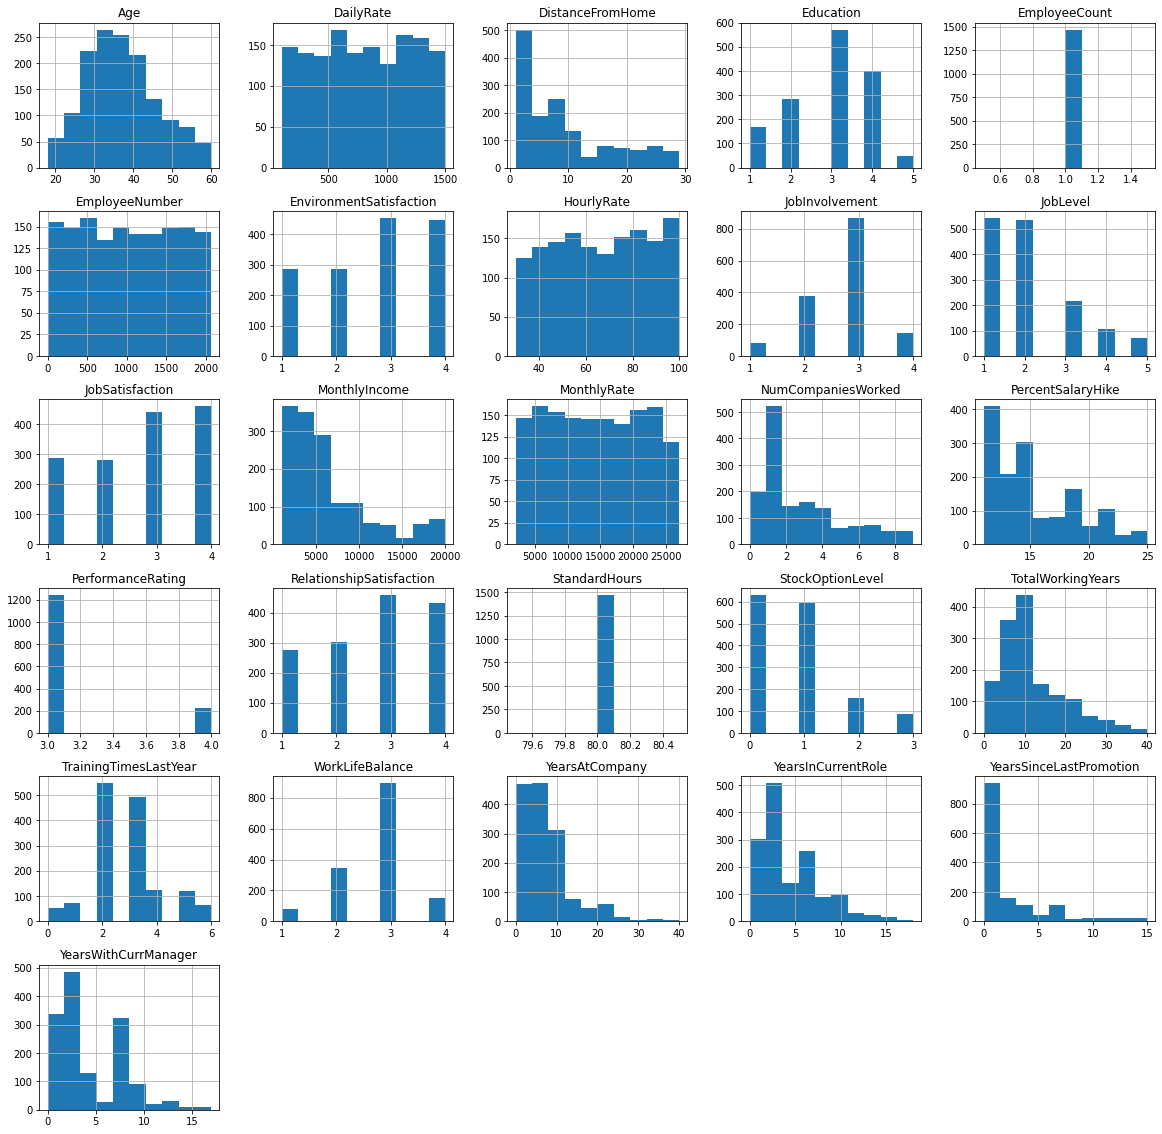

In [ ]:
df.hist(figsize = (20,20))
plt.show()

#### What can we observe from these plots ?

1. Many histograms are tail-heavy; 

  - Lot of attributes are right-skewed\
 (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany)

  - Data transformation methods **may be** required for standardisation
    - Recall why standardisation is preferred ?

2. Some features seem to have normal distributions
  
  - Eg: Age: 
    - Slightly right-skewed normal distribution 
    - Bulk of the staff between 25 and 45 years old

3. Some features are constant

  - Eg: EmployeeCount and StandardHours are constant values for all employees. 
  
  - They're likely to be redundant features.

  - #### How can these features contribute to our problem ?
    - Constant features are not in any way useful for predictions
    - So we can drop these features from the dataset

4. Some features seem to be uniformly distributed.

  - Eg: EmployeeNumber

  - **Uniformly distributed and constant features won't contribute** to our analysis. Why?
    - Each value is equally likely to occur
    
  - #### So what should we do ?
    - We can drop these features from our dataset

5. Some features are categorical i.e **binomially/multinomially distributed**

  - Eg: WorkLifeBalance, StockOptionLevel etc

  - #### Can we use these features directly in our problem ?
    - No. They willl first have to be encoded

  - #### Recall which encoding has to be used for which features
    
    - Binary Encoding (0/1) : Features with only 2 unique values
  
    - Label Encoding (0, 1, 2, 3 ....) :  More than 2 unique values having a particular order

  - OneHot Encoding ([0 0 0 1], ...) : More than 2 unique values having no order

  - Target encoding ([0.1, 0.33, .....)] : Features with a lot of unique vals having no order


7. We can also see from these features that their ranges vary a lot

  - Recall why different feature scales can be a problem

  - We will deal with this problem later

First, lets remove the features that won't contribute to our analysis


In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

Now lets encode our categorical features

#### Which encoding technique should we use ?
  
  - It depends upon:
    - Number of unique values a feature has
    - If there is a sequence between the feature vals

Lets first check how many unique values each feature has


In [ ]:
def unique_vals(col):

  if col.dtype == "object":

    print(f'{col.name}: {col.nunique()}')

df.apply(lambda col: unique_vals(col))

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


Age                         None
Attrition                   None
BusinessTravel              None
DailyRate                   None
Department                  None
DistanceFromHome            None
Education                   None
EducationField              None
EnvironmentSatisfaction     None
Gender                      None
HourlyRate                  None
JobInvolvement              None
JobLevel                    None
JobRole                     None
JobSatisfaction             None
MaritalStatus               None
MonthlyIncome               None
MonthlyRate                 None
NumCompaniesWorked          None
OverTime                    None
PercentSalaryHike           None
PerformanceRating           None
RelationshipSatisfaction    None
StockOptionLevel            None
TotalWorkingYears           None
TrainingTimesLastYear       None
WorkLifeBalance             None
YearsAtCompany              None
YearsInCurrentRole          None
YearsSinceLastPromotion     None
YearsWithC

#### On basis of this info, which encoding technique should we use ?

 - We will use binary encoding for features with 2 or less unique val.
 - For features < 6 unique vals we will use OneHot encoding
 - Rest of the categorical features will be Target encoded


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))

Attrition
Gender
OverTime


In [ ]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)

In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,2,0,94,3,...,6,4,0,5,0,1,0,1,0,1
1,49,0,279,8,1,Life Sciences,3,1,61,2,...,10,7,1,7,1,0,1,0,1,0
2,37,1,1373,2,2,Other,4,1,92,2,...,0,0,0,0,0,1,1,0,0,1
3,33,0,1392,3,4,Life Sciences,4,0,56,3,...,8,7,3,0,1,0,1,0,1,0
4,27,0,591,2,1,Medical,1,1,40,3,...,2,2,2,2,0,1,1,0,1,0


#### Lets analyse the target feature now

In [ ]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [ ]:
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### What can we infer from this info ?
  - The dataset is extremely imbalanced
  - Recall how we deal with imbalanced data

For this dataset we will use SMOTE oversampling technique to balance the data

But SMOTE is applied only to training set

So we need to split the data first

#### In what sets should we split it ?
  
  - Train/test set
  
  - #### Why not create a validation set ?
    - We already have less amount of data
    - And we want to train the model with max possible data
    - So we will use K-Fold cross validation instead
  
#### What ratios should we use for splitting ?
  - 80%/20% for train/test looks enough

Lets split the dataset now

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [ ]:
len(X_train.columns)

33

Now we will first perform target encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [ ]:
X_sm.shape

(1848, 33)

In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,5,4,0,1,0,1,0,1,0,1
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,0,1,1,0,0,1
2,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,1,0,1,0,1,0
3,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,0,1,1,0,0,1
4,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,41,928,16,2,0.131455,2,1,63,3,1,...,1,1,1,1,0,0,1,0,0,0
1844,26,546,2,1,0.239583,2,1,75,2,1,...,6,4,0,4,0,0,1,0,0,1
1845,32,904,10,2,0.127479,3,0,75,2,1,...,5,5,1,5,1,0,1,0,0,0
1846,39,986,4,2,0.147971,2,0,94,3,2,...,6,3,0,5,0,1,0,0,0,0


### Preprocessed data

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 62.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 69.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 13.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 8.32MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_sm = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_sm = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Now that our dataset is ready lets move to the next step

### Which model should we use for training ?
  
  - This is a binary classification problem. 

#### So what models can we use for this problem ?

   - #### Can we use Logistic regression ?
    - Yes, but it only works on **linearly separable data**
    - Lets try and see its performance on our dataset


In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_sm, y_sm)
clf.score(X_sm, y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7164502164502164

#### What can you infer from this ?
  1. The data requires scaling. Recall why ?
  2. Accuracy achieved is very low

#### Why is the accuracy so low ?
  - Because data is not linearly separable

So if we want to use LoR we will have to make the features polynomial

This will add a lot of complexity to the problem

Lets consider another model

#### Can we use KNNs since the data is non-linear?
  - Lets see how a KNN might perform

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=10)
cross_val_score(neigh, X_sm, y_sm, cv=5)


array([0.6972973 , 0.73783784, 0.78918919, 0.76693767, 0.75609756])

#### What can we infer from these results ?
  - Performance achieved by KNN is slightly better

#### But what are the disadvantages of using KNN ?
  - Requires lot of time and space during testing
  - #### Why ?
    - Because entire training data is used each time for inference

#### Which algorithm should we use then for this problem ?
  - This is where decision trees come into picture.

## Decision Trees Intuition


#### What are decision trees ?
  - Lets understand this through an example

  - Say, you've two features:
    - Age
    - Overtime hours

  - Lets say these two features are non-linearly separable as shown below

  - Now on the basis of this data we want to find if an employee would churn 

<img src='https://drive.google.com/uc?id=1J2LRJK_LNRBnlj2JdrbSW-2L2t9DCLEu'>


As you can see from the above diagram:

The green lines together represent the decision boundary

#### How are these hyperplanes dividing the sample space ?
  - Lets consider a sample x and check hyperplanes **x.age=35** and **x.age=29**
```
  If x.age > 35
      Employee x would churn

  If x.age > 29 and x.age < 35
      Employee x would stay

  If x.age < 29
      Employee x can both churn or stay
```

  - For **x.overtime=2.5**:

  ```
  If x.age < 29:
    
      If x.overtime < 2.5:
        Employee would stay
    
      If x.overtime > 2.5:
        Employee would churn
  ```


#### How can we combine these rules ?

```
If age < 29:
    If overtime < 2.5hrs:
        Employee will stay
    else:
        Employee will churn

else:
    if age < 35:
        Employee will stay
    else: 
        Employee will churn
```


#### Can you determine the shape of the decision boundary if it is made up of only if-else rules ?
  - All decison boundaries are going to axis-parallel

#### But what if we want the decision boundary to be tilted towards an axis ? 

#### Can it made using just axis-parallel hyperplanes ?
  - Yes
  - By designing a staircase like structure

  <img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrca5r0H09OT6kp_xpqDAWXct6tjavRVluNQ2ikyYgHlNoWBDPwhpptxo00VQ79-EzQ38&usqp=CAU" height = 300>

Moving on, let's represent these if else conditions diagramatically:


<img src='https://drive.google.com/uc?id=1i6ANNyKQCiPUE8azKIeTf343UJxPbcGt'>


#### What can you notice from this diagram ?

- The structure resembles a tree. 
- This is what a **Decision Tree** is
  - A decision tree is a bunch of nested if else statements (rules). 
- Topmost node is called root node
- Bottom nodes are called leaf node.
- Nodes in between these two are called internal/ decision nodes.

So we can see that decision trees are very helpful in prediction of non-linear decision boundaries

#### Decision Trees have one more advantage though. What is it ?
  - Easily interpretable
  - Let's take an example:
    - One conclusion that can be derived from above decision tree is 
      - Employees younger than 29 yrs and work overtime >= 2.5hrs are more likely to churn
    - This can help the company take specific decisions in this direction to reduce attrition such as:
      - Incentivise overtime
      - Reducing workload


#### Now how do we design Decision Trees for our dataset ?
  - Obviously, we cannot manually create rules for the entire data
  - So, we will have to **learn** these rules from the data

### But how can we **learn** decision tree rules from our data ?

Our purpose is to achieve max possible predicition confidence and accuracy

#### How do decision trees improve predicition confidence ?
  - By dividing heterogenous subspaces into smaller subspaces

#### What kind of a subspace do we want to get ultimately ?
  - A homogenous one i.e. which contains data belonging to only one class 
  - #### Why ?
    - Confidence of predicition will be maximum in this case

Notice from the above example that at each node we are splitting the data based on a certain condition

Each condition is based on a feature
  
In the above example:
  - Features are age and overtime

After each split the children nodes created are more homogenous than the parent node

So we need to decide two things for splitting a node:
  - Feature
  - Condition placed on the feature

These will then form our decision tree rules

#### How to split the nodes? 

  - Lets consider the same example we used earlier for this 
  
Lets say we don't know the decision boundaries here

Since we are building a decision tree, the only info we have is that decision boundary is made of axis-parallel lines

#### So how can we arrive at the hyperplanes to use ?
  - It is obvious that we can use 3 hyperplanes
    - Age = 35
    - Age = 29
    - Overtime - 2.5

We earlier saw that we first divided the subspace using Age=29 then Age = 25 and then Overtime=2.5

#### What if we can find a better order ? What if we can use these hyperplanes in other ways ? 
  - For eg:
    - Should we divide the entire sample space using overtime = 2.5
    - Or should we constrain it ?

#### How can we decide which hyperplanes to use and how to use them ?

To understand this, lets consider each hyperplane one-by-one

#### Should we divide this data first using Age = 35 ?
  - Lets see what happens if we do
  - We will obviously classify age > 35 points as positive and rest as negative
  - Lets create separate graphs for both of these sample spaces

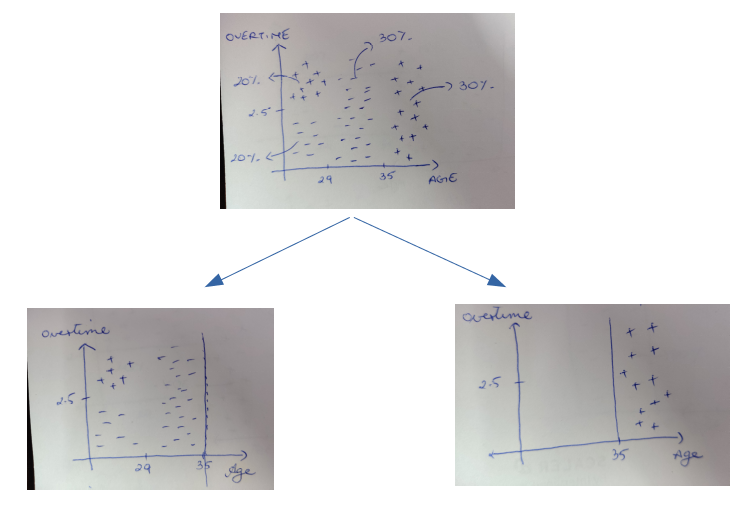

#### What can we infer from Age=35 split ?
  - All age > 35 points are correctly classified (30% of total data)
  - All negative points on left side of age = 35 line are correctly classified (50% of total data)
  - Misclassified points - Positive points on left side of line (20% of data)

Lets look at other splits to see if we can find something better

#### What if we split using Age = 29 line ?
  - Lets see what happens

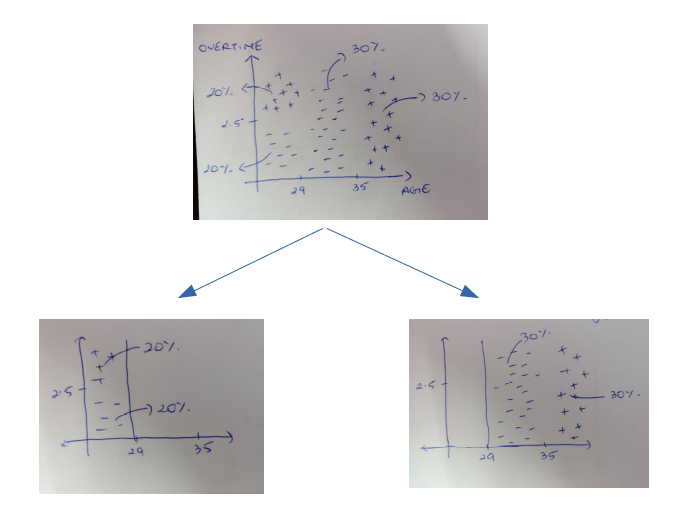

#### What can we infer from this split ?
  - If we classify age > 29 as positive then
    - 30% of pts are correctly classified
    - 30% are misclassified

  - And for age < 29 as negative
    - 20% of pts are correctly classified
    - 20% are 
    
  - So 50% points are misclassified

Finally lets look at the last split



#### Should we divide this data using Overtime = 2.5 ?

Lets see what happens if we do

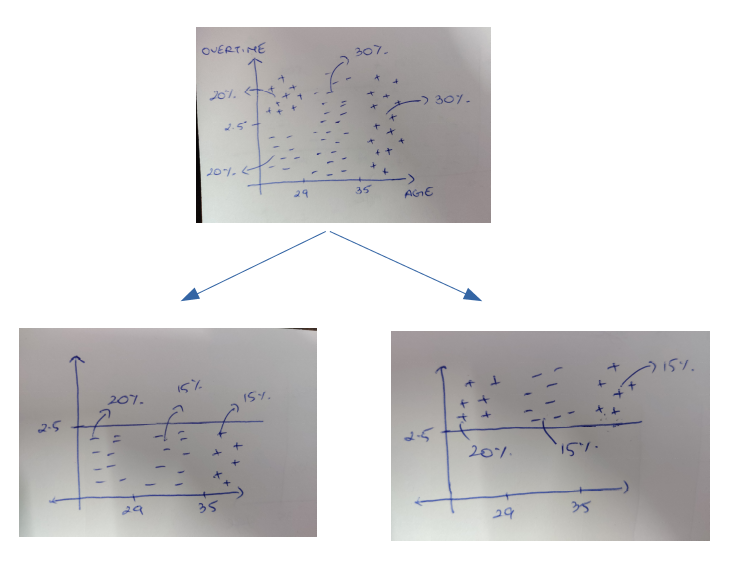

#### What can we infer from this split ?
  - If we classify overtime > 2.5 as positive then
    - 35% of pts are correctly classified
    - 15% are misclassified

  - And for overtime < 2.5 as negative
    - 35% of pts are correctly classified
    - 15% are misclassified

#### So which split do you think is the best ?
  - Split 1 (Age = 35)

#### Why split 1 is the best ?
  - Because accuracy of prediction using this split is the maximum (80%)

#### But is this split enough ?
  - No
  - We can create more splits in the data to have a better performance

#### Now in a general scenario, what kind of split do you think would be the best ?
  
  - A split that creates homogenous subspaces (Reason mentioned before)
  - The children nodes created in this case are called **pure nodes**


#### So what are pure nodes ?
  - Nodes which have points belonging to one class only

#### Which nodes created by splits in the above example pure ?
  - Only the node created by Age > 35 split

#### What about the rest of the nodes ?
  - All the other splits created nodes having points belonging to more than one class
  - This means these nodes are impure

#### Why is it best to create pure nodes ?
  - Because in this case uncertainty of prediction would be the lowest
  - They also don't require any further splitting

#### So what is the process of creating a Decision tree ?
  
  - Start with a root node having all the training data
  - Split the nodes recursively using a feature for each node
  - Stop splitting when a node becomes pure.

For each node the combination of feature + condition that creates the least heterogenous child nodes would the best one

#### But how do we compare the heterogenity of children created by splitting a node ?
  - Using impurity measures

Lets see what they are

## Impurity Measures

We have already discussed what purity of nodes is

#### Then what is impurity ?
  - Amount of heterogenity in a node/subspace
  - More heterogenity => More impurity

#### What does heterogenity of a node depend on ?
  - Ratios of classes in the node
  - This means that impurity of a node will only depend upon the ratio of classes

#### So what are impurity measures ?
  - They tell us how impure a node is

#### What about the impurity of a pure node ?
  - Pure nodes are homogenous
  - Hence for a pure node; impurity=0

We now have a basic understanding of what impurity measures are

Now lets try to understand it more concretely

The data in our example used above contains only two classes (binary classification)

#### Lets consider an example to understand how an impurity measure for binary classification might look like

  - Suppose you have a bag which contains balls of 2 colours:
    - N number of Red balls and 
    - M number of Green balls

  - Now lets say we want to find out that if a ball is drawn at random, which colour it belongs to 

  - Hence, $If\ N=0\ or\ M=0:$
    - We can say with 100% confidence which colour the ball belongs to

  - If this were a node in the decision tree, it would be a pure node
  - So, the **impurity of a pure node = 0**
  - This is the minimum possible impurity of a node

  - Now lets say $N = M$:
    - #### What will the probabilities of ball drawn being red and green ? 
      - P(Ball drawn is Red) = N/(N + M) = 1/2
      - P(Ball drawn is green) =  M/(N+M) = 1/2

    - So we will have to randomly guess which colour the ball belongs to.

    - The confidence of prediction in this case will be 50%.

  - #### Can the confidence of prediction be any lower than this ?
    - No
    - Because we will always choose the majority class

  - #### What will we want the impurity in this case ?
    - When **$N=M$: Impurity is maximum**

  - #### Also what will be the change in confidence of prediction if we switch the balls, i.e., make the red balls green and vice-versa ?
    - Suppose intially M > N
    - Now number of red balls: M
    - #Green balls: N
    - P(Red) = M/(M+N)
    - P(Green) = N(M+N)

    - We choose Red since P(Red) > P(Green)
    - #### What will be the confidence of prediction ?
      - P(Red) = M/(N+M)

    - So confidence will remain unchanged
  
  - #### What does this say about the impurity ?
    - It should be symmetric

  - #### Around which point should it be symmetric ?
    - Around the maxima


#### Which curves would you prefer to use which satisifies the above conditions ?
  
  - Log curves 
  - Exponention curves (Parabolas)
  - And many more ...




  
      
  


### Entropy

As we saw a lot of different impurity measures can be used for splitting a node

One such impurity measure is **Entropy**

#### What is the mathematical formula for entropy ?
  - Imagine Y be a discrete random variable.
    - it can take k discrete values i.e y ∈ {$y_1, y_2, y_3, ..., y_k$}

  - We define entropy (H) as 
    - $H(Y) = - ∑_{i=1}^k p(y_i)log(p(y_i))$

where $p(y_i)$ is the probability that random variable $Y = y_i$

#### What will be the base of log ?
  - We'll use base 2 log here
  - However any base would be fine
   


<img src='https://drive.google.com/uc?id=1zXjeacy-xA4CeuOMvJOA1JokhQANwg5Y'>



#### Lets expand this formula for entropy for binary classes

  - #### What will be the entropy of a binary R.V. Y ?

    - $H(Y) = - (P(Y=0)log(P(Y=0)) + P(Y=1)log(P(Y=1)))$
    - where 
      - P(Y=0) => Probability(Y=0)
      - P(Y=1) => Probability(Y=1)

If we assume: **P(Y=1) is p**

$H(Y) = - ( plog(p) + (1-p)log(1-p) )$

#### Why do we take a minus of the log sum ?
  - Probability of any R.V. is always less than 1
  - Log(Anything less than 1) is negative
  - We established earlier that impurity of a node cannot be negative 
  - Hence we negate the log sum to make the entropy positive





<img src='https://drive.google.com/uc?id=1WsOpDcOZyP9rk-Tsj-rib5x9oFDIgWlD'>



### Plot for entropy

Now, we have the formula for calculating entropy

$H(Y) = -P(Y=0)log(P(Y=0)) - P(Y=1)log(P(Y=1))$

or 

$H(Y) = -plog(p) - (1-p)log(1-p)$ 

Let's plot it.

Some interesting properties to notice:

- The values of the plot range from 0 to 1.
- The maxima lies at x = 0.5
- Maximum value of entropy for binary case will be 1 (log base 2).

#### Question: How can you prove that maxima will lie at 0.5?
Ans: By taking 1st and 2nd derivative.


<img src='https://drive.google.com/uc?id=1RyLw7suL5bkf1cWQ9-4sA9GP2EBPke6M' width = 600>


### Case for maximum/minimum entropy (for binary case)


#### Question: When is the entropy maximum? 

Entropy is maximum when p(Y=1) = 0.5

Similarly, the entropy is minumum or 0 when the probability of Y =1 is either 1 or 0. 





<img src='https://drive.google.com/uc?id=1vD0FGEJZiEMHOV5Bo9jijvOh3i7ANmmS'>



As you can see from the above curve it satisfies all the conditions we listed for an impurity measure

Now that we understand what entropy is lets code it

**Note:** 
- In this implementation, `probs` is a `1 x 2` vector, containing the values of `P(Y=0)` and `P(Y=1)`. 
- We are using vector calculations for faster result.
- Hence, we just take a `np.sum` to get the final entropy value.

In [ ]:
def entropy_df(y):
  
  print(y)
  probs = y.value_counts()/y.shape[0]
  entropy = np.sum(-probs * np.log2(probs + 1e-9)) # adding delta 1e-9 in case p = 0 as log(0) is not defined

  return(entropy)

### Relating Entropy with Purity
#### How can we use Entropy in node splitting?

  - At each node we try to find that split which minimizes the entropy.
  - #### Why ?
    - Because we want to arrive at pure nodes
    - Mathematically, pure node will have minimum entropy
    - Hence, we should find the split with minimum entropy.


<img src='https://drive.google.com/uc?id=1_qut59pHNuJFxvPLiCkv1QP_gtivEblG'>


Lets solve the example we used earlier to understand this better

#### Question: What'll be the entropy for root node ? 

  - As we have equal number of +ve and -ve points, entropy H(root) = 1.
    - $H(root) = -plog_2(p) - (1-p)log_2(1-p)$

  - Here, p = 0.5 (prob (y = 1) => 100/200 = 1/2 )

  - $H(root) = -1/2*log_2(1/2) - (1 - 1/2)*log_2(1- 1/2)$

  => -1/2*-1 -1/2*-1 = **1** ($log_2(1/2) = -1$)

#### What would be the entropy if we split using Age = 35 hyperplane ?
  
  - It creates 2 children nodes as we saw earlier 


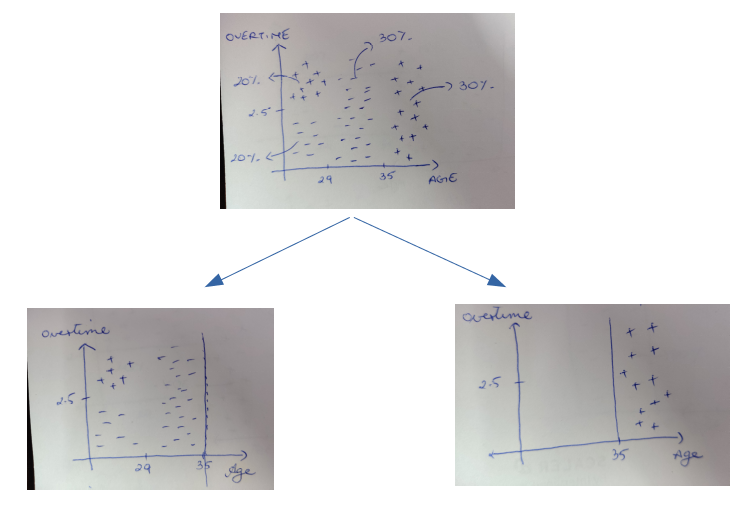

#### What is the entropy of children for this split?
  - Left node (Age < 35):
    - P(Negative) = 5/7
    - P(Positive) = 2/7


In [ ]:
p_neg = 5/7
p_pos = 2/7

entropy = - (p_neg*np.log2(p_neg) + p_pos*np.log2(p_pos))
print(entropy)

0.863120568566631



  - Right node (Age > 35):
    - P(Positive) = 1
    - P(Negative) = 0
    - Hence entropy = 0
    - Its a pure node

#### What would be the entropy for split by age = 29 ?

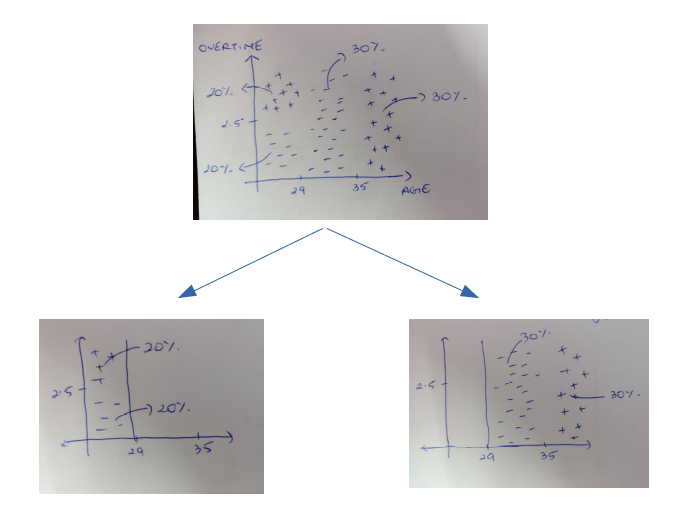

- Left node (Age < 29):
  - P(Pos) = 0.5
  - P(Neg) = 0.5
  - Entropy = 1

- Right node (Age > 29):
  - P(Pos) = 0.5
  - P(Neg) = 0.5
  - Entropy = 1

#### And for split using Overtime = 2.5 ?

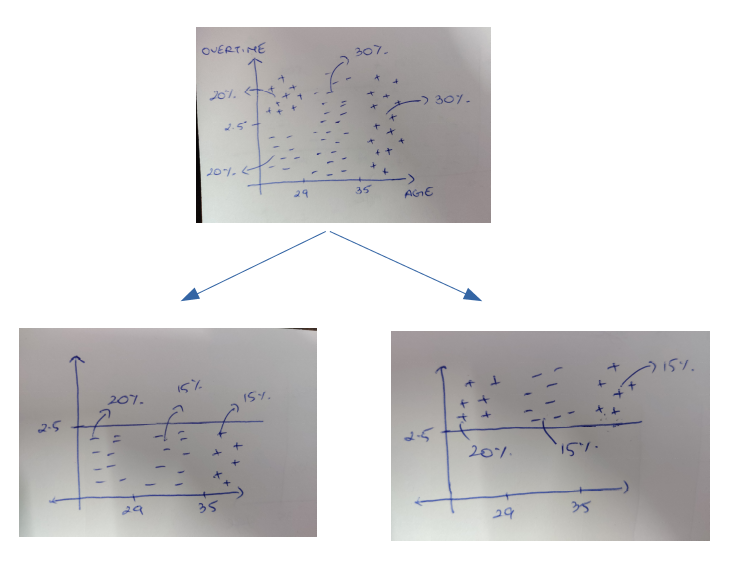

- Left node (Overtime < 2.5):
  - P(Pos) = 3/10 = 0.3
  - P(Neg) = 0.7


In [ ]:
p_neg = 3/10
p_pos = 7/10

entropy = - (p_neg*np.log2(p_neg) + p_pos*np.log2(p_pos))
print(entropy)

0.8812908992306927



- Right node (Overtime > 2.5):
  - P(Pos) = 0.7
  - P(Neg) = 0.3


In [ ]:
p_neg = 0.7
p_pos = 0.3

entropy = - (p_neg*np.log2(p_neg) + p_pos*np.log2(p_pos))
print(entropy)

0.8812908992306927


Now how do we compare these splits

We need a single metric to do so

#### How can we create a single metric to compare splits?
  - #### Can we take average of entropies of child nodes ?
    - This would mean that we would be assigning equal importance to each node
  
  - #### Will this be correct ?
    - Imagine a child node having 1000 data points and entropy of 1 
    - And another child node having only 10 data points and entropy of 0
    - Their total entropy would be 0.5 which is relatively less
    
  - #### Do you see the problem now ? So what should we do to solve it ?
    - We take their weighted sum
    - Lesser the weighted sum, better is the split

So for Split 1: Weighted sum = (0.7)(0.864) + (0.3)(0) = 0.6

For split 2: Weighted sum = (0.6)(1) + (0.4)(1) = 1

For split 3: Weighted sum = (0.5)(0.88) + (0.5)(0.88) = 0.88

#### So which Option is best to split ?
  - **Option 1**

#### There is one more thing ... Is it good to split a node if weighted entropy sum of children nodes is more than entropy of parent ?
  - Obviously not
  - #### Why?
     - Because that would mean that children have more impurity than the parent node.

The difference between Entropy(Parent) - Weighted Entropy Sum(children) is called **Information Gain**


<img src='https://drive.google.com/uc?id=1trIvsH-Yo0FKGYzKrrk4FT_FBs9RK8s_'>



Lets see the code for weighted entropy and information gain

In [ ]:
def calculate_weighted_entropy(feature,y):
    categories = feature.unique()

    weighted_entropy = 0

    for category in categories:
        y_category = y[feature == category]
        entropy_category = entropy_df(y_category)
        weighted_entropy += y_category.shape[0]/y.shape[0]*entropy_category

    
    return weighted_entropy

In [ ]:
def information_gain_entropy(feature,y):
    parent_entropy = entropy_df(y)

    child_entropy = calculate_weighted_entropy(feature,y)

    ig = parent_entropy - child_entropy

    return ig

#### So what is the step-by-step process of creating Decision Trees ?

1. Create a root node that contains all the data
2. Split each node using a feature that gives maximum information gain
3. Repeat step 2 recursively for all nodes until we the node becomes pure or IG < 0 

Now that we know how to split nodes, lets see what decision tree is made using the algorithm for our example

#### How do we split left node created using split Age = 35 ?
  - Again find the Weighted sum of entropies of all children for each feature
  - Feature with min weighted sum is used to split
  - Lets try this

#### What will be the weighted sum of entropy for Age = 29 ?
  - Left node (Age < 29):
    - P(Neg) = 1/2
    - P (Pos) = 1/2
    - Entropy = 1

  - Right node (Age > 29):
    - P(Neg) = 1
    - P(Pos) = 0
    - Entropy = 0

  - Weighted sum = (3/7)(1) + (4/7)(0) = 3/7 = 0.428

#### And what will be the case for overtime = 2.5 ?
  - Left node (Overtime < 2.5)
    - P(Neg) = 1
    - P(Pos) = 0
    - Entropy = 0

  - Right node (Overtime > 2.5)
    - P(Pos) = 20/35 = 4/7
    - P(Neg) = 3/7
    - Entropy = - (3/7)log(3/7) - (4/7)log(4/7)
    - Entropy = 0.5247 + 4613 = 0.986

  - Weighted sum = (0.5)(0.986) + (0.5)(0) = 0.493

So we will split left node using **Age = 29**

#### What about right node of root ?
  - Its a pure node
  - So it requires no further splitting





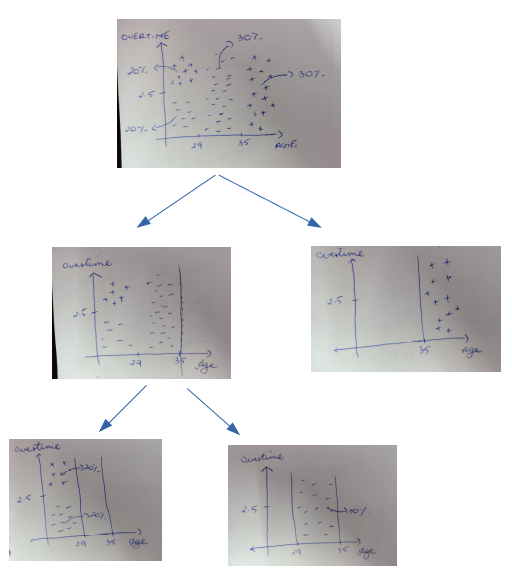

Now lets split the new nodes created

We have only 1 feature using which we can split the nodes : Overtime = 2.5

#### What will be the entropy of leftmost node on splitting using Overtime = 2.5 ?
  - Left Node (Overtime < 2.5):
    - P(Neg) = 1
    - P(Pos) = 0
    - Entropy = 0

  - Right Node (Overtime > 2.4):
    - P(Pos) = 1
    - P(Neg) = 0
    - Entropy = 0

  - Weighted sum = 0 


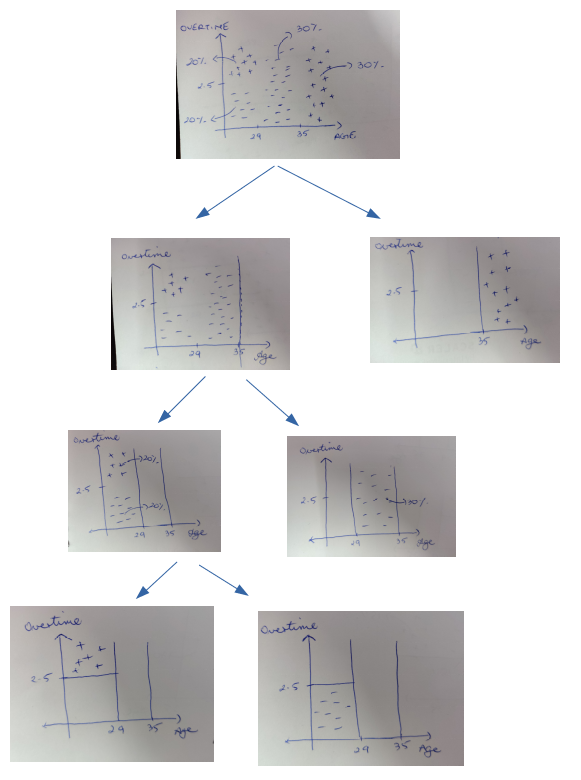

#### Interactive GUI for entropy (Optional)

https://mlu-explain.github.io/decision-tree/


<img src='https://drive.google.com/uc?id=1VsC7KnTg0pKLdSIl-lb4YjjqMINI82pI'>




## Gini - Impurity / Gini Index

#### But using entropy has certain disadvantages. What are these ?

  - It requires log of probability.
  - log is computationally expensive 
  - We have to calculate entropy for each feature at each node
  - This becomes time consuming.

#### How to resolve this issue?
  - This is where **Gini Impurity** can be used

Gini impurity is also a measure like entropy which is used to measure purity

#### What is its mathematical formula ?
  - Let **GI** be **Gini Impurity**
  - Gini Impurity of random variable Y is given by: 
  - GI(Y) = $1-∑_{i=1}^k(p(y_i)^2)$
  - For a binary classification:
    - GI(y) = $1-[(p(y_i=1))^2+(p(y_i=0))^2]$
    - Notice that this function satisfies all the conditions we derived before





<img src='https://drive.google.com/uc?id=18K19yOplDDUg3K-LGH6X16h_atSOgrbE'>



<img src='https://drive.google.com/uc?id=1wxHEHlGsH9K8q9G75csdSWr1DUtkM4mJ'>



In [ ]:
def gini_impurity(y):
  p = y.value_counts()/y.shape[0]
  gini = 1-np.sum(p**2)
  return gini

### What would be the difference in building a tree with GI as compared to entropy ?

  - Lets understand this through some examples

#### Case 1:

- p($y_+$) be 0.5 and  p($y_-$) be 0.5
- Here the entropy will be high
  - Entropy = 1

#### What will be Gini impurity in this case?

- GI = 1 - (0.25 + 0.25) = 0.5


<img src='https://drive.google.com/uc?id=1t-MX5z2kAdvqA0hMOcgZlI3DNm8k1P5h'>


#### Case 2

let p($y_+$) be 1 and  p($y_-$) be 0

#### Question: What will be entropy in this case?
Ans: Entropy will be 0

#### What will be Gini Impurity? 
* GI(Y) = 1 - (1 + 0) = 0




<img src='https://drive.google.com/uc?id=1ugbQnYUnB_ROmyK3ykYjKMeFPzVSIIZ_'>


From the above two examples we can see that
-  Gini-Impurity is high when entropy is high
- it is low when the entropy is low

Let's plot the graph of Entropy as well as Gini Impurity:

Notice that, 

1. When the **nodes are pure** i.e for
    - if p($y_+$) = 1 and p($y_-$) = 0, or
    - if p($y_+$) = 0 and p($y_-$) = 1

**the Entropy and Gini-Impurity are zero**

2. when the **probability of p($y_+) =\frac{1}{2}$ and p($y_-)=\frac{1}{2}$**
    -  **the entropy and Gini- Impurity are maximum**

* So, we can conclude that Gini-Impurity has same behaviour as entropy.
  


<img src='https://drive.google.com/uc?id=1ei3q-Wt-Ts9_9BEV_FOKJZ1rqH68X3ck'>


### Question: How do we calculate Information Gain using Gini Impurity? 

* We can get Information gain by using Gini-Impurity also,
 
**Information Gain = GI(Gini Impurity) of parent node - Weighted GI of the child nodes**

Lets see the code for this as well

In [ ]:
def calculate_weighted_gini(feature, y):
    categories = feature.unique()

    weighted_gini_impurity = 0

    for category in categories:
        y_category = y[feature == category]
        gini_impurity_category = gini_impurity(y_category)
        # print(category)
        # print(gini_impurity_category)
        weighted_gini_impurity += y_category.shape[0]/y.shape[0]*gini_impurity_category

    
    return weighted_gini_impurity

In [ ]:
def information_gain_gini(feature,y):
    parent_gini = gini_impurity(y)

    child_gini = calculate_weighted_gini(feature,y)

    ig = parent_gini - child_gini

    return ig

#### But which impurity measure should we use for our problem ?
  - To be done

## Building a DT (intuiton)
Now that we have understood the process of building a DT lets build one from scratch for our problem

Lets take a look at our dataset again



In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,41,1077,10,3,0.187471,2,1,85,2,2,...,4,0.407817,0.592183,0.0,0.000000,0.407817,0.592183,0.592183,0.000000,0.407817
1844,55,310,7,1,0.239573,3,1,71,3,1,...,7,0.000000,0.000000,1.0,0.000000,0.998141,0.001859,0.000000,0.998141,0.001859
1845,36,899,5,2,0.143813,1,0,92,2,1,...,2,0.677643,0.322357,0.0,0.000000,1.000000,0.000000,0.677643,0.322357,0.000000
1846,40,292,7,3,0.151584,1,1,84,3,3,...,5,0.192577,0.807423,0.0,0.000000,1.000000,0.000000,0.807423,0.192577,0.000000


This dataset contains both categorical and numerical features

We will learn about how to use numerical features later 

For now lets simplify the problem by handpicking some categorical features and build a decision tree from there

In [ ]:
X_sub = pd.concat([X_sm["JobLevel"], X_sm["Gender"], X_sm["Education"]], axis=1)
X_sub

,JobLevel,Gender,Education
0,2,0,4
1,1,1,1
2,2,0,3
3,2,1,3
4,1,1,3
...,...,...,...
1843,2,1,3
1844,1,1,1
1845,1,0,2
1846,3,1,3




#### Before proceeding, which impurity measure should we use for our problem ?
  - Lets build DTs with both of these impurity measures and see which one would be better


#### **Step 1**: Splitting the root node
  - Find out impurity of the root node
  - Find out the feature that would give the best Info Gain/Gini Reduction

In [ ]:
entropy_root = entropy_df(y_sm)
entropy_root

0       0
1       0
2       0
3       0
4       0
       ..
1843    1
1844    1
1845    1
1846    1
1847    1
Name: Attrition, Length: 1848, dtype: int64


0.99999999711461

In [ ]:
gini_root = gini_impurity(y_sm)
gini_root

0.5

#### What can we infer from this ?
  - Root node has a very high impurity
  - #### Why ?
    - Ratio of classes in root node is equal

Now that we have the impurity of the root, lets find the best feature to split it

#### How can we do that ?
  - By finding out weighted impurity of children nodes created for each feature

In [ ]:
mxIG = 0
splitFeatureEntropy = ""

mxGiniReduction = 0
splitFeatureGini = ""

for feature in X_sub.columns[:]:
  
  infoGain = information_gain_entropy(X_sub[feature], y_sm)
  giniReduction = information_gain_gini(X_sub[feature], y_sm)
  
  print(f'{feature}:\n\tEntropy: {infoGain}\n\tGini Impurity: {giniReduction}\n')
  
  if infoGain > mxIG:

    splitFeatureEntropy = feature
    mxIG = infoGain

  if giniReduction > mxGiniReduction:

    splitFeatureGini = feature
    mxGiniReduction = giniReduction

0       0
1       0
2       0
3       0
4       0
       ..
1843    1
1844    1
1845    1
1846    1
1847    1
Name: Attrition, Length: 1848, dtype: int64
0       0
2       0
3       0
5       0
7       0
       ..
1811    1
1832    1
1838    1
1839    1
1843    1
Name: Attrition, Length: 580, dtype: int64
1       0
4       0
13      1
16      0
22      0
       ..
1841    1
1842    1
1844    1
1845    1
1847    1
Name: Attrition, Length: 892, dtype: int64
6       0
8       0
9       0
14      0
20      0
       ..
1818    1
1829    1
1831    1
1836    1
1846    1
Name: Attrition, Length: 238, dtype: int64
12      0
69      0
81      0
84      0
107     0
       ..
1312    1
1364    1
1385    1
1495    1
1539    1
Name: Attrition, Length: 88, dtype: int64
42      0
62      0
77      0
99      0
106     0
112     0
124     0
126     0
194     0
197     0
225     0
228     0
242     0
260     0
356     0
366     1
378     0
398     0
410     0
411     0
415     0
425     0
428     0
465  

#### So which feature should we use to split the root node ?
  - Wrt entropy



In [ ]:
splitFeatureEntropy

'JobLevel'

  - Wrt Gini Impurity



In [ ]:
splitFeatureGini

'JobLevel'

Lets see the ratio of classes in children nodes created by splitting the root node

In [ ]:
unq_vals = X_sub[splitFeatureEntropy].unique()
children = 1

for i in unq_vals :

  print(f'Child {children}:\n')
  children += 1

  print(y_sm[X_sub[splitFeatureEntropy] == i].value_counts())

  print()

Child 1:

0    362
1    218
Name: Attrition, dtype: int64

Child 2:

1    585
0    307
Name: Attrition, dtype: int64

Child 3:

0    137
1    101
Name: Attrition, dtype: int64

Child 4:

0    74
1    14
Name: Attrition, dtype: int64

Child 5:

0    44
1     6
Name: Attrition, dtype: int64



#### What can you infer from this ?
  - Children nodes have a ratio slightly better than 1:1
  - As we recursively keep splitting each node, the ratio will keep getting better

Also, notice that both the impurity measures give same feature for splitting the root node

#### Does this mean both impurity measure would give same trees ?
  
  - Not necessarily
  - Lets create the entire DT and find out

  


#### **Step 2**: Recursively split each node using the best possible feature 

In [ ]:
class node:
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    self.isLeaf = False
    self.children = []
    self.feature = None
    self.val = None

  def setChildren(self, children):
    self.children = children


Lets now create the root node which will initially contain all the data

Lets create separate trees for Gini Impurity and Entropy

In [ ]:
DT_Entropy = node(X_sub, y_sm)
DT_Gini = node(X_sub, y_sm)

In [ ]:
def createTree(root, imp):

  splitFeature = None
  IG_max = 0

  X = root.X
  Y = root.Y

  for feature in X.columns:
    
    IG_feat = 0

    if imp == "entropy":
      IG_feat = information_gain_entropy(X[feature], Y)

    else:
      IG_feat = information_gain_gini(X[feature], Y)

    if IG_feat > IG_max:
      splitFeature = feature
      IG_max = IG_feat

  if splitFeature:

    unq_vals = X[splitFeature].unique()
    splits = []

    root.feature = splitFeature

    for i in unq_vals:
      
      X_child = X[X[splitFeature] == i].reset_index()
      X_child = X_child.drop(columns=[splitFeature, "index"])
      Y_child = Y[X[splitFeature] == i].reset_index()
      Y_child = Y_child.drop(columns=["index"])

      child = node(X_child, Y_child)
      child.val = i

      splits.append(child)

    root.setChildren(splits)

    for i in root.children:
      createTree(i, imp)

  else:
    node.isLeaf = True   

In [ ]:
createTree(DT_Entropy, "entropy")
createTree(DT_Gini, "gini")

0       0
1       0
2       0
3       0
4       0
       ..
1843    1
1844    1
1845    1
1846    1
1847    1
Name: Attrition, Length: 1848, dtype: int64
0       0
2       0
3       0
5       0
7       0
       ..
1811    1
1832    1
1838    1
1839    1
1843    1
Name: Attrition, Length: 580, dtype: int64
1       0
4       0
13      1
16      0
22      0
       ..
1841    1
1842    1
1844    1
1845    1
1847    1
Name: Attrition, Length: 892, dtype: int64
6       0
8       0
9       0
14      0
20      0
       ..
1818    1
1829    1
1831    1
1836    1
1846    1
Name: Attrition, Length: 238, dtype: int64
12      0
69      0
81      0
84      0
107     0
       ..
1312    1
1364    1
1385    1
1495    1
1539    1
Name: Attrition, Length: 88, dtype: int64
42      0
62      0
77      0
99      0
106     0
112     0
124     0
126     0
194     0
197     0
225     0
228     0
242     0
260     0
356     0
366     1
378     0
398     0
410     0
411     0
415     0
425     0
428     0
465  

In [ ]:
def printTree(root, h):

  for i in range(h):
    print("  ", end="")

  if root.isLeaf:
    print()

  if root.val is not None:
    print("=>", end="")
    print(root.val, end="")
    print(":", end="")

  if root.feature:
    print(root.feature)

  else:
    print("Leaf")

  print()

  for i in root.children:
    printTree(i, h+1)


printTree(DT_Entropy, 0)

JobLevel

  =>2:Gender

    =>0:Education

      =>4:Leaf

      =>3:Leaf

      =>2:Leaf

      =>5:Leaf

      =>1:Leaf

    =>1:Education

      =>3:Leaf

      =>4:Leaf

      =>1:Leaf

      =>2:Leaf

      =>5:Leaf

  =>1:Education

    =>1:Gender

      =>1:Leaf

      =>0:Leaf

    =>3:Gender

      =>1:Leaf

      =>0:Leaf

    =>2:Gender

      =>0:Leaf

      =>1:Leaf

    =>5:Gender

      =>1:Leaf

      =>0:Leaf

    =>4:Gender

      =>1:Leaf

      =>0:Leaf

  =>3:Education

    =>4:Gender

      =>1:Leaf

      =>0:Leaf

    =>2:Gender

      =>1:Leaf

      =>0:Leaf

    =>1:Gender

      =>1:Leaf

      =>0:Leaf

    =>3:Gender

      =>0:Leaf

      =>1:Leaf

    =>5:Gender

      =>0:Leaf

      =>1:Leaf

  =>4:Education

    =>3:Gender

      =>1:Leaf

      =>0:Leaf

    =>2:Leaf

    =>4:Gender

      =>1:Leaf

      =>0:Leaf

    =>1:Gender

      =>0:Leaf

      =>1:Leaf

    =>5:Leaf

  =>5:Gender

    =>1:Education

      =>4:Leaf

      =>3:Leaf

      =>1:

#### What can you infer from this ?
  - Both Entropy and Gini create the same tree
  - The leaf nodes are **NOT PURE** even though we have used all the features

#### Do you think this is the best possible Decision Tree ?
- #### No - Why ?
  - The steps we used to build the DT are greedy in nature\

#### Why are these steps greedy though ?
  - Whenever we split a node we find the feature that gives max IG at that split
  - It might happen that a slightly worse split at the current step might create a better DT in the future
  - Lets look at a simple example to undertand this better:


#### Why do we need to use a greedy strategy though ? Why not try every possible DT ?
  - Because it will take a lot of time and memory
  - Infact it will be exponential in terms of the nodes and features

#### So what is the time complexity of our greedy strategy ?

Let 
- n be the number of data points 
- m be the number of nodes and 
- d be the depth of the tree 

Then, 
- **Train time complexity** is **$O(nlog(n)*d)$**
    - where nlog(n) is the time taken to sort numerical features
    - multiplied by d, as you have to calculate split for d features

- The **Run Time complexity** of the tree of depth d is O(depth) 
    - as we only have to evaluate at max d condtions

- The **Space complexity** of the tree is O(m)
    - we only have to store **m if else condtions**

Here,  depth is the function of number of nodes i.e log(m)   
 
If $d_{best}$ is computated using cross validation the decision tree will be very efficient at runtime.


As you can see this time complexity is polynomial in nature and and thus can be executed in finite time

<img src='https://drive.google.com/uc?id=1lgpPR9T2IxGxWsmUH9D8hO-5NTQtJFqE'>

### Summary

This is all for today

#### What all did we learn ?
  - Decision trees
  - Their relevance and usage
  - Impurity measures
    - Entropy
    - Gini
  - How to create a DT
